In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import scipy.stats as stats

In [2]:
# Import first dataset
totalvehicle_data = pd.read_csv('DataSets/TOTALSA.csv', )
totalvehicle_data = totalvehicle_data.dropna()
totalvehicle_data.head()

,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962


In [3]:
# Clean DataSet 1
totalvehicle_data2 = totalvehicle_data.loc[totalvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
totalvehicle_data2.head()

,DATE,TOTALSA
516,2019-01-01,17.291
517,2019-02-01,16.968
518,2019-03-01,17.733
519,2019-04-01,16.898
520,2019-05-01,17.725


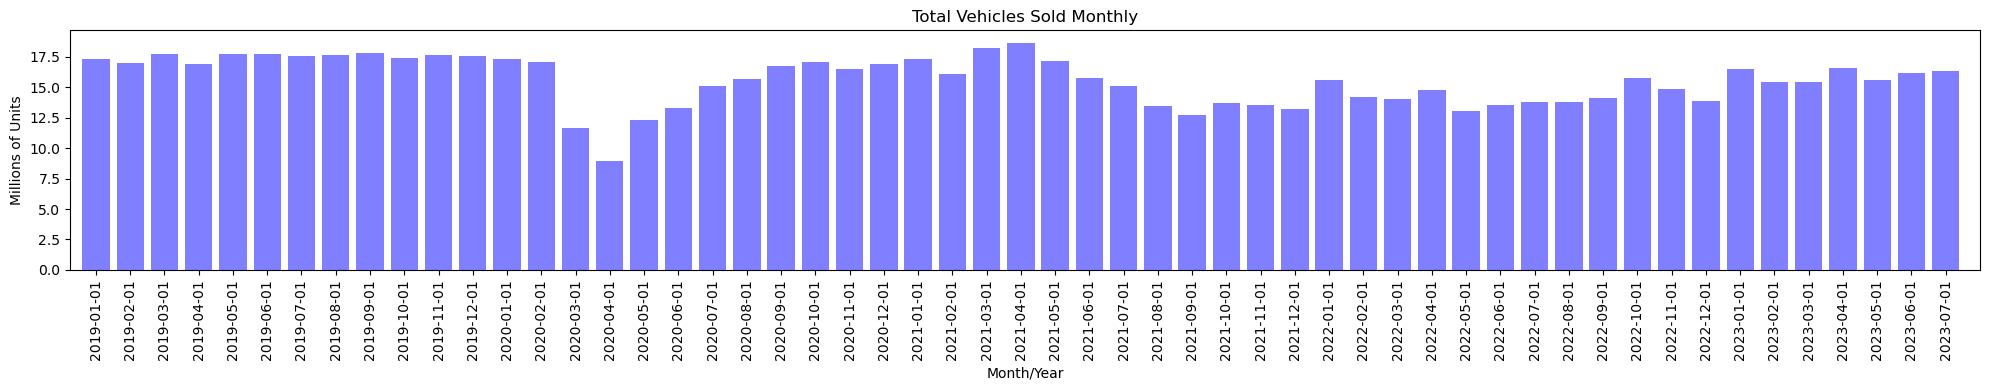

In [4]:
# Set x axis and tick locations
x_axis = np.arange(len(totalvehicle_data2))
tick_locations = [value for value in x_axis]

#Plot
plt.figure(figsize=(20,4))
plt.bar(x_axis, totalvehicle_data2["TOTALSA"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, totalvehicle_data2["DATE"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(totalvehicle_data2["TOTALSA"])+1)

# Set a Title and labels
plt.title("Total Vehicles Sold Monthly")
plt.xlabel("Month/Year")
plt.ylabel("Millions of Units")

# Save our graph
plt.tight_layout()
plt.savefig("Images/total_vehicles.png")
plt.show()

In [22]:
# Import first dataset V2
totalvehicle_dataV2 = pd.read_csv('DataSets/TOTALSA_Percent Change.csv', )
totalvehicle_dataV2 = totalvehicle_dataV2.dropna()
totalvehicle_dataV2.head()

,DATE,TOTALSA_PC1
0,1977-01-01,12.34587
1,1977-02-01,10.26237
2,1977-03-01,13.39513
3,1977-04-01,14.45965
4,1977-05-01,15.59944


In [23]:
# Clean DataSet 1.V2
totalvehicle_data2V2 = totalvehicle_dataV2.loc[totalvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
totalvehicle_data2V2.head()

,DATE,TOTALSA_PC1
516,2020-01-01,0.13302
517,2020-02-01,0.54809
518,2020-03-01,-34.13410
519,2020-04-01,-47.19493
520,2020-05-01,-30.44852


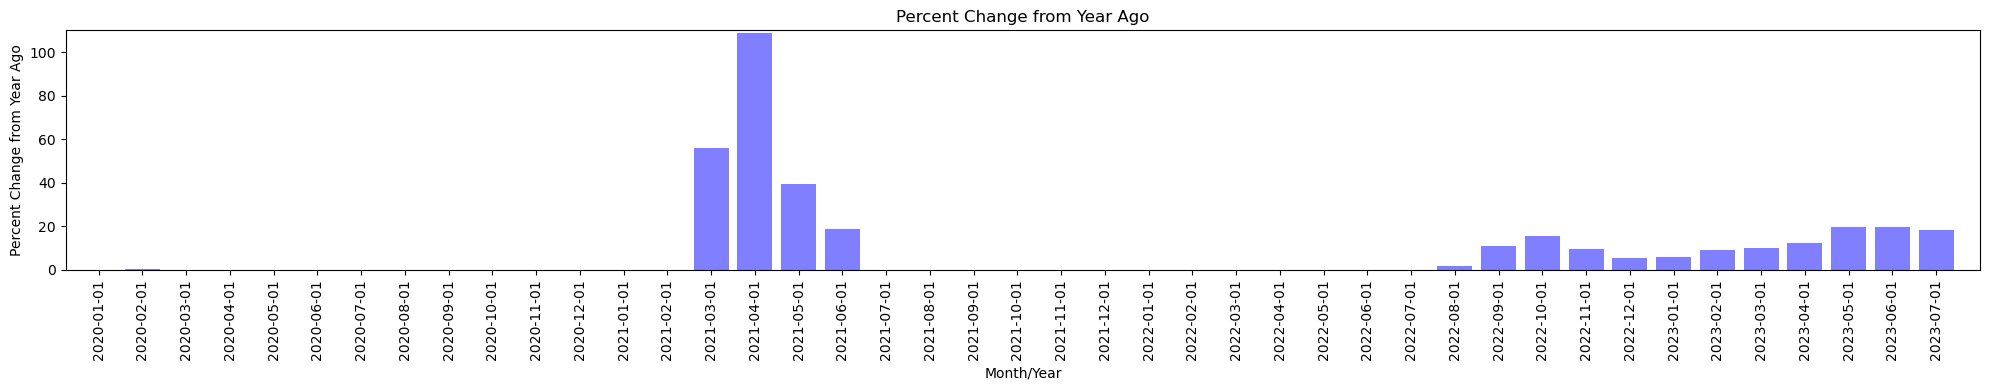

In [24]:
# Set x axis and tick locations
x_axis = np.arange(len(totalvehicle_data2V2))
tick_locations = [value for value in x_axis]

#Plot
plt.figure(figsize=(20,4))
plt.bar(x_axis, totalvehicle_data2V2["TOTALSA_PC1"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, totalvehicle_data2V2["DATE"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(totalvehicle_data2V2["TOTALSA_PC1"])+1)

# Set a Title and labels
plt.title("Percent Change from Year Ago")
plt.xlabel("Month/Year")
plt.ylabel("Percent Change from Year Ago")

# Save our graph
plt.tight_layout()
plt.savefig("Images/total_vehicles.png")
plt.show()

In [5]:
# Import second dataset
meanvehicle_data = pd.read_csv('DataSets/CUSR0000SETA01.csv')
meanvehicle_data = meanvehicle_data.dropna()
meanvehicle_data.head()

,DATE,CUSR0000SETA01
0,1953-01-01,46.3
1,1953-02-01,46.8
2,1953-03-01,46.9
3,1953-04-01,47.3
4,1953-05-01,47.5


In [6]:
# Clean DataSet 2
meanvehicle_data2 = meanvehicle_data.loc[meanvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
meanvehicle_data2.head()

,DATE,CUSR0000SETA01
792,2019-01-01,147.849
793,2019-02-01,147.822
794,2019-03-01,148.516
795,2019-04-01,147.788
796,2019-05-01,147.071


In [7]:
meanvehicle_data2['Year'] = pd.DatetimeIndex(meanvehicle_data2['DATE']).year
meanvehicle_data2.head()

C:\Users\david\AppData\Local\Temp\ipykernel_10904\2558405324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meanvehicle_data2['Year'] = pd.DatetimeIndex(meanvehicle_data2['DATE']).year


,DATE,CUSR0000SETA01,Year
792,2019-01-01,147.849,2019
793,2019-02-01,147.822,2019
794,2019-03-01,148.516,2019
795,2019-04-01,147.788,2019
796,2019-05-01,147.071,2019


In [8]:
# Determine 2019 Average
population1 = meanvehicle_data2[meanvehicle_data2["Year"] == 2019]
population1.CUSR0000SETA01.mean()

146.83641666666668

In [9]:
# Determine 2023 Average
population2 = meanvehicle_data2[meanvehicle_data2["Year"] == 2023]
population2.CUSR0000SETA01.mean()

178.62885714285716

In [10]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population1.CUSR0000SETA01, population2.CUSR0000SETA01, equal_var=False)

Ttest_indResult(statistic=-99.40886445205801, pvalue=1.1334816356016832e-21)

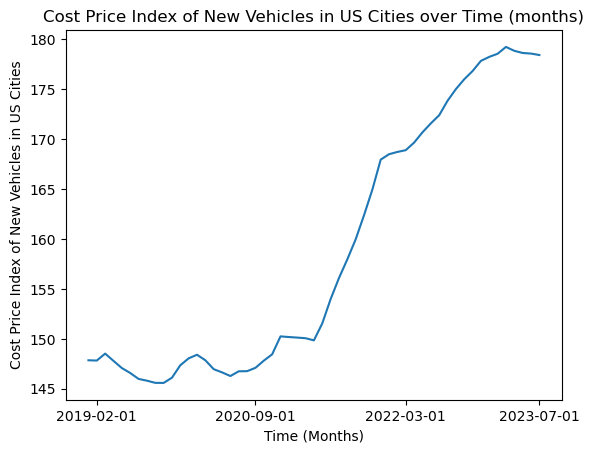

In [11]:
#Plot
plt.plot(meanvehicle_data2.DATE, meanvehicle_data2.CUSR0000SETA01)
plt.title("Cost Price Index of New Vehicles in US Cities over Time (months)")
plt.xlabel("Time (Months)")
plt.ylabel("Cost Price Index of New Vehicles in US Cities")
plt.xticks([1, 20, 38, 54])

# Save our graph
plt.savefig("Images/meanvehicle_data2.png")

In [12]:
# Import second dataset V.2
meanvehicle_data = pd.read_csv('DataSets/CUSR0000SETA01(Percent Change Previous Year).csv')
meanvehicle_data = meanvehicle_data.dropna()
meanvehicle_data.head()

,DATE,CUSR0000SETA01_PC1
0,2020-06-01,-0.20876
1,2020-07-01,0.52198
2,2020-08-01,0.65292
3,2020-09-01,1.03305
4,2020-10-01,1.53041


In [13]:
# Import third dataset
newvehicle_data = pd.read_csv('DataSets/IPUHN44111T051000000.csv')
newvehicle_data = newvehicle_data.dropna()
newvehicle_data.head()

,DATE,IPUHN44111T051000000
0,1988-01-01,2.5
1,1989-01-01,2.4
2,1990-01-01,1.2
3,1991-01-01,3.1
4,1992-01-01,3.1


In [14]:
# Clean DataSet 3
newvehicle_data2 = newvehicle_data.loc[newvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
newvehicle_data2.head()

,DATE,IPUHN44111T051000000
31,2019-01-01,0.9
32,2020-01-01,1.3
33,2021-01-01,10.2
34,2022-01-01,12.0


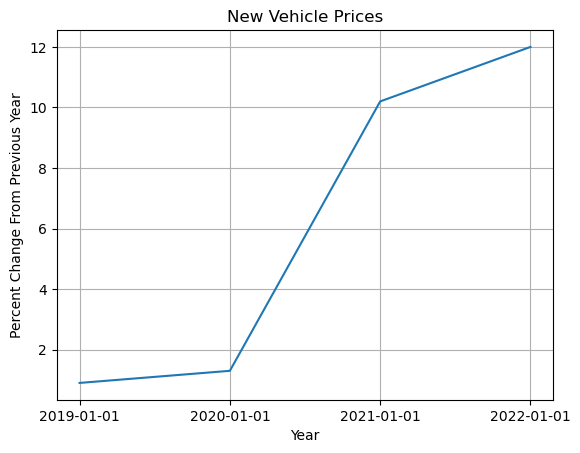

<Figure size 640x480 with 0 Axes>

In [15]:
#Plot
plt.plot(newvehicle_data2.DATE, newvehicle_data2.IPUHN44111T051000000)
plt.title("New Vehicle Prices")
plt.xlabel("Year")
plt.ylabel("Percent Change From Previous Year")
plt.grid()
plt.show()

# Save our graph
plt.savefig("Images/newvehicle_data2.png")

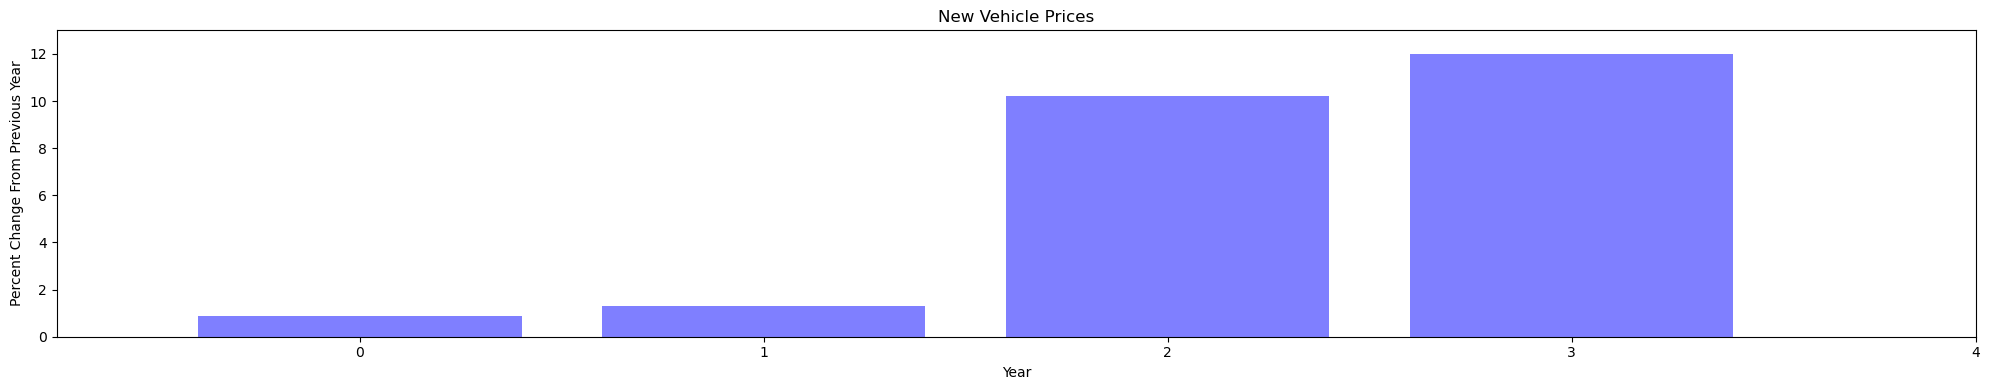

In [16]:
# Set x axis and tick locations
x_axis = np.arange(len(newvehicle_data2))
tick_locations = [value for value in x_axis]
#Plot
plt.figure(figsize=(20,4))
plt.bar(x_axis, newvehicle_data2["IPUHN44111T051000000"], color='b', alpha=0.5, align="center")
# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(newvehicle_data2["IPUHN44111T051000000"])+1)
# Set a Title and labels
plt.title("New Vehicle Prices")
plt.xlabel("Year")
plt.ylabel("Percent Change From Previous Year")
plt.tight_layout()
plt.show()

# Save our graph and show the grap
#plt.savefig("Images/newveh.vehicle_data2.v2.png")

In [17]:
# Import fourth dataset
singlevehicle_data = pd.read_csv('DataSets/train.csv')
singlevehicle_data = singlevehicle_data.dropna()
singlevehicle_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [18]:
# Delete extraneous columns
singlevehicle_data2 = singlevehicle_data.drop(['ID', 'Levy', 'Model',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'], axis = 1)
singlevehicle_data2.head()

,Price,Manufacturer,Prod. year,Mileage
0,13328,LEXUS,2010,186005 km
1,16621,CHEVROLET,2011,192000 km
2,8467,HONDA,2006,200000 km
3,3607,FORD,2011,168966 km
4,11726,HONDA,2014,91901 km


In [19]:
# Use df.astype() method to convert the datatype of the "Prod. year" column
singlevehicle_data3 = singlevehicle_data2.astype({"Prod. year": str}, errors='raise')
singlevehicle_data3.head()

,Price,Manufacturer,Prod. year,Mileage
0,13328,LEXUS,2010,186005 km
1,16621,CHEVROLET,2011,192000 km
2,8467,HONDA,2006,200000 km
3,3607,FORD,2011,168966 km
4,11726,HONDA,2014,91901 km


In [20]:
# Clean DataSet 4
singlevehicle_data4 = singlevehicle_data3.loc[singlevehicle_data3["Prod. year"].between("2019", "2023")]
singlevehicle_data4.head()

,Price,Manufacturer,Prod. year,Mileage
36,51746,TOYOTA,2019,10200 km
56,87112,MERCEDES-BENZ,2019,5323 km
81,7527,TOYOTA,2019,27656 km
170,470,MAZDA,2019,11566 km
261,59865,HYUNDAI,2019,13000 km


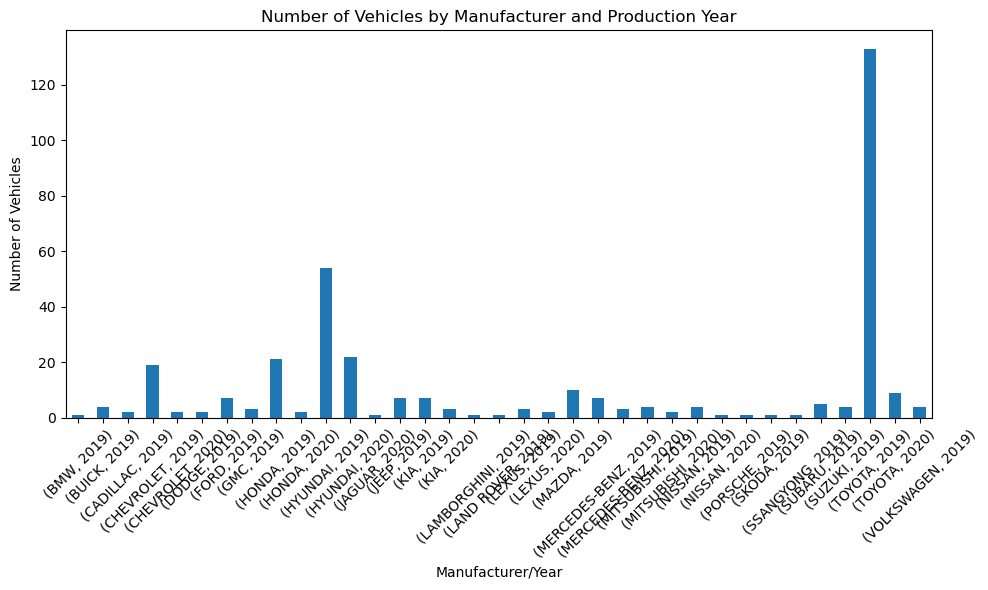

<Figure size 640x480 with 0 Axes>

In [21]:
#Plot
singlevehicle_data3 = pd.read_csv('DataSets/train.csv')
singlevehicle_data4 = singlevehicle_data3.loc[singlevehicle_data3["Prod. year"].astype(str).between("2019", "2023")]
year_counts = singlevehicle_data4.groupby(["Manufacturer", "Prod. year"]).size()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Vehicles by Manufacturer and Production Year')
plt.xlabel('Manufacturer/Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save our graph
plt.savefig("Images/singlevehicle_data3.png")